<a href="https://colab.research.google.com/github/Mr-Slippery/aifractals/blob/main/load_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
N = 256

[<PIL.Image.Image image mode=L size=256x256 at 0x7FE063C14550>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063CA7C50>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE06777E390>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE06856B9D0>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE069780190>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C23390>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C23A10>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE0698F8710>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C239D0>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C23FD0>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C2C3D0>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C231D0>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C4A650>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C2C410>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063C2CD50>, <PIL.Image.Image image mode=L size=256x256 at 0x7FE063

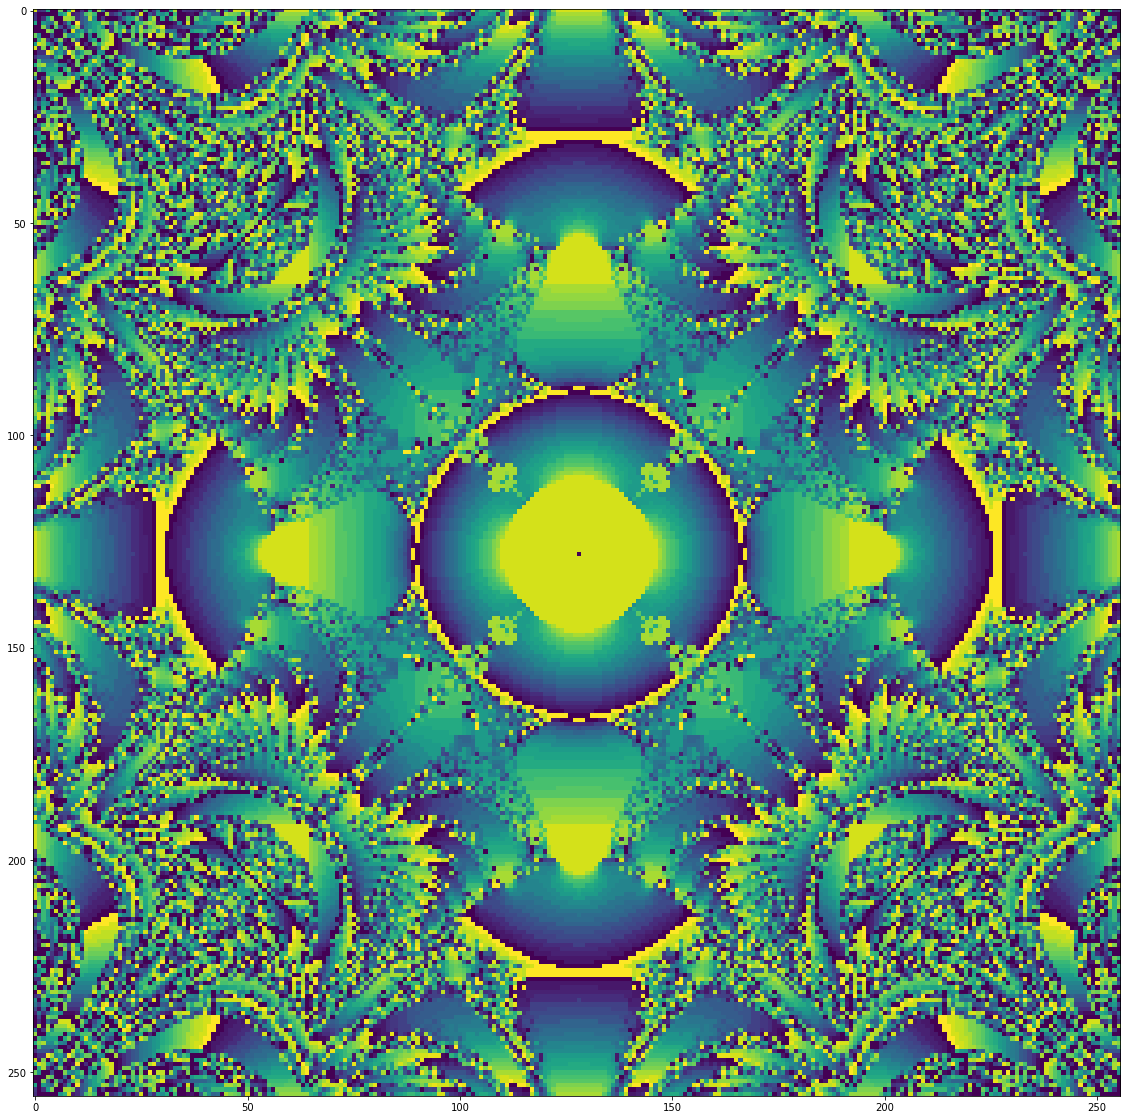

In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline 

input_folder = '/content/gdrive/MyDrive/Colab Notebooks/images/Mandelbrot'

# image_list = [ImageOps.grayscale(ImageOps.fit(Image.open(name), (N, N))) for name in glob.glob(input_folder + '/*.png')]
image_list = [ImageOps.grayscale(Image.open(name)) for name in glob.glob(input_folder + '/*.png')]

def show(img, figsize=(20, 20), title=None):
  plt.figure(figsize=figsize)
  plt.imshow(img)
  if title:
    plt.title(title)
  plt.show()

print(image_list)

show(image_list[-1])

In [4]:
binary_samples = np.array([sample.getdata() for sample in image_list])

In [5]:
print(binary_samples[0])
print(len(binary_samples))

[232 208 104 ...   0 216   0]
100


In [6]:
new_samples = binary_samples.reshape(len(image_list), N, N)

In [7]:
print(new_samples)

[[[232 208 104 ... 136 104 208]
  [208   0 216 ...   0 216   0]
  [104 216 192 ... 128 192 216]
  ...
  [136   0 128 ...  16 128   0]
  [104 216 192 ... 128 192 216]
  [208   0 216 ...   0 216   0]]

 [[232  96  24 ...  72  24  96]
  [ 96   0 160 ...   0 160   0]
  [ 24 160 152 ...  64 152 160]
  ...
  [ 72   0  64 ... 160  64   0]
  [ 24 160 152 ...  64 152 160]
  [ 96   0 160 ...   0 160   0]]

 [[232 152  64 ... 104  64 152]
  [152   0 192 ...   0 192   0]
  [ 64 192 176 ...  96 176 192]
  ...
  [104   0  96 ... 216  96   0]
  [ 64 192 176 ...  96 176 192]
  [152   0 192 ...   0 192   0]]

 ...

 [[224   0  48 ... 208  48   0]
  [  0   0  80 ...   0  80   0]
  [ 48  80 168 ... 200 168  80]
  ...
  [208   0 200 ...   0 200   0]
  [ 48  80 168 ... 200 168  80]
  [  0   0  80 ...   0  80   0]]

 [[232   0 224 ...  88 224   0]
  [  0   0 200 ...   0 200   0]
  [224 200   0 ...  72   0 200]
  ...
  [ 88   0  72 ...   8  72   0]
  [224 200   0 ...  72   0 200]
  [  0   0 200 ...   0 200  

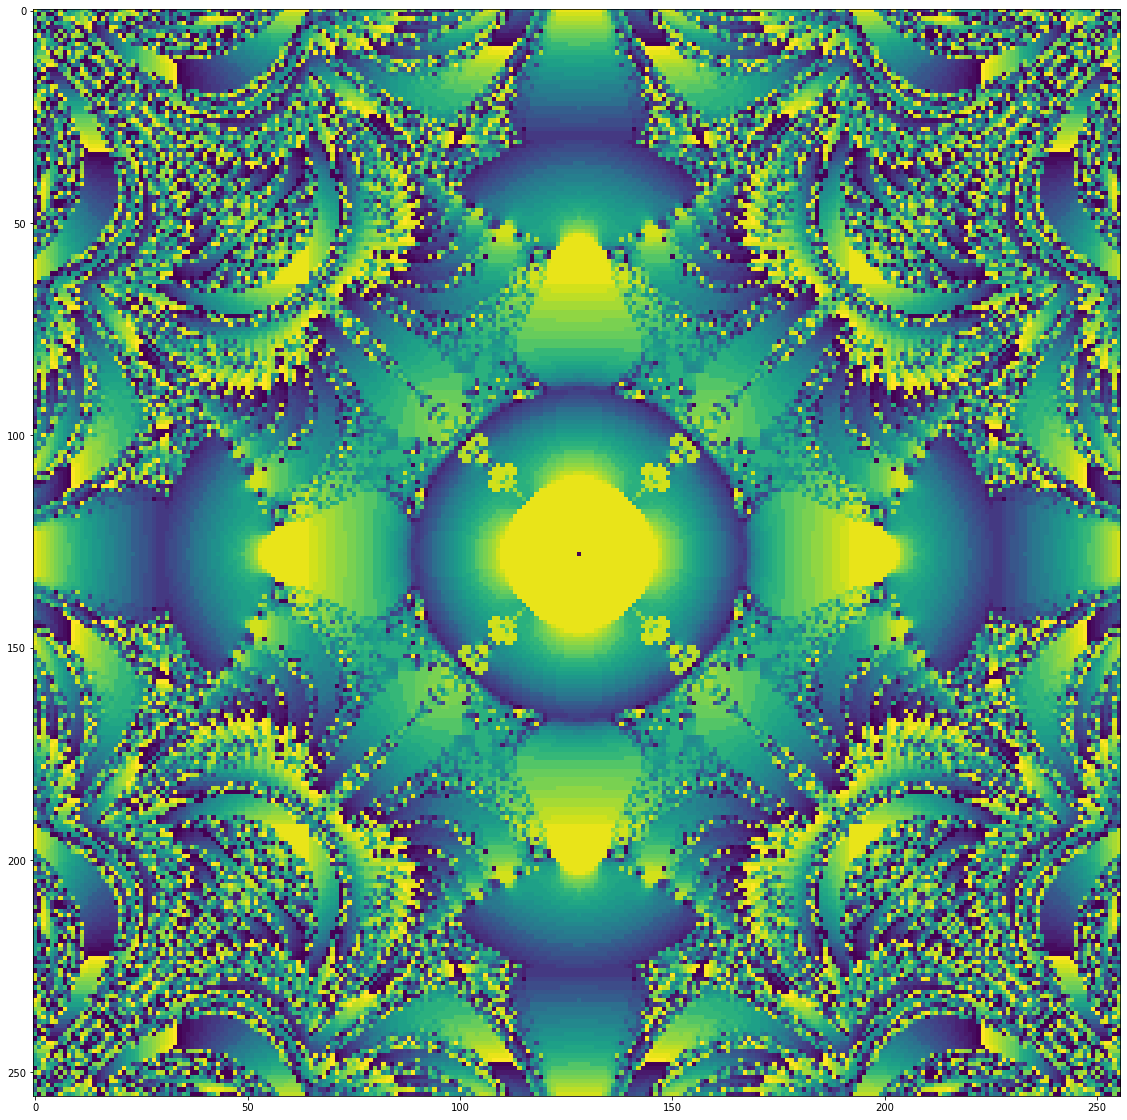

In [8]:
show(new_samples[2])

In [9]:
classes = np.array([0 for _ in range(203)]).reshape(-1)
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
xfile = 'fractals_x_test.npy'
yfile = 'fractals_y_test.npy'
np.save(xfile, new_samples)
np.save(yfile, classes)

In [11]:
x_test = np.load(xfile)
y_test = np.load(yfile)
x_test.shape, y_test.shape

((100, 256, 256), (203,))

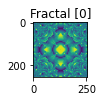

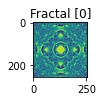

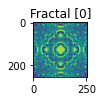

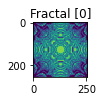

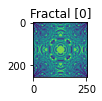

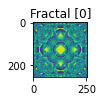

In [12]:
for i in np.random.randint(x_test.shape[0], size=6):
    show(x_test[i], title=f'Fractal [{y_test[i]}]', figsize=(1,1))

In [13]:
import tensorflow as tf

In [14]:
tf.__version__

'2.6.0'

In [15]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ss3huypt
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ss3huypt
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0aaa86bd4f547d9a4990e4d3698967e13ed835a49_-py3-none-any.whl size=157213 sha256=5a7deee49bfb8890f9b1f205105f532c8f84ba9863d6afc2a472f8c6ea196e83
  Stored in directory: /tmp/pip-ephem-wheel-cache-3hx5wua0/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [16]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [17]:
train_images = x_test

In [18]:
train_labels = y_test

In [19]:
train_images = train_images.reshape(train_images.shape[0], N, N, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [20]:
BUFFER_SIZE = 6000
BATCH_SIZE = 20

In [21]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [22]:
print(train_dataset)

<BatchDataset shapes: (None, 256, 256, 1), types: tf.float32>


In [23]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(N*N*256/16, use_bias=False, input_shape=(N,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((N//4, N//4, 256)))
    assert model.output_shape == (None, N//4, N//4, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, N//4, N//4, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, N//2, N//2, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, N, N, 1)

    return model

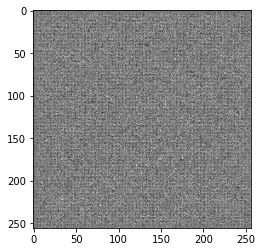

In [24]:
generator = make_generator_model()

noise = tf.random.normal([1, N])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [25]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[N, N, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [26]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-6.8747235e-05]], shape=(1, 1), dtype=float32)


In [27]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [28]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [29]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [30]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [31]:
checkpoint_dir = '/mount/gdrive/MyDrive/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [32]:
EPOCHS = 60
noise_dim = N
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [33]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [34]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [35]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

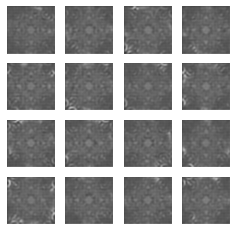

In [36]:
train(train_dataset, EPOCHS)

In [37]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [38]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [39]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


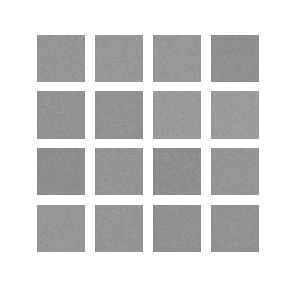

In [40]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

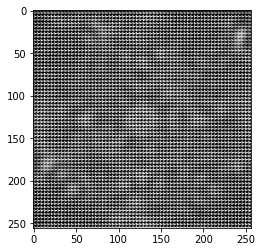

In [41]:
noise = tf.random.normal([1, N])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [42]:
plt.imsave("sample_gen.png", generated_image[0, :, :, 0])

In [43]:
from google.colab import files as FILE
FILE.download("sample_gen.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
FILE.download('dcgan.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>